In [1]:
import org.apache.spark.sql.functions._
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.DenseVector
import org.apache.spark.ml.regression.LinearRegression
import org.apache.spark.ml.feature.VectorAssembler
import org.apache.spark.ml.feature.MinMaxScaler
import org.apache.spark.ml.feature.PolynomialExpansion
import org.apache.spark.ml.evaluation.RegressionEvaluator
import breeze.plot._
import convert.jfc.tohtml

## Load the dataset

In [2]:
val df = spark.read.
  format("csv").
  option("header", "true").
  option("inferschema", "true").
  option("delimiter",",").
  load("../Datasets/Accelerating_particle.csv")

df = [t: double, z: double]


[t: double, z: double]

## Explore the dataset

In [3]:
df.show(10)

+---------------+---------------+
|              t|              z|
+---------------+---------------+
|            0.0| 0.581492499944|
|  0.01001001001| 0.109579774655|
|  0.02002002002| 0.736651613589|
|  0.03003003003|  1.48598356416|
|  0.04004004004|  1.74318272131|
|0.0500500500501|-0.180520976165|
|0.0600600600601| 0.592680533783|
|0.0700700700701|  1.16782126493|
|0.0800800800801| 0.556445117136|
|0.0900900900901|-0.408362632843|
+---------------+---------------+
only showing top 10 rows



In [4]:
df.printSchema

root
 |-- t: double (nullable = true)
 |-- z: double (nullable = true)



In [5]:
df.describe().show()

+-------+------------------+------------------+
|summary|                 t|                 z|
+-------+------------------+------------------+
|  count|              1000|              1000|
|   mean| 5.000000000000049| 17.64991205090991|
| stddev|2.8910854464052678|14.983189399049817|
|    min|               0.0|    -1.35666247476|
|    max|              10.0|      51.253265726|
+-------+------------------+------------------+



In [6]:
df.columns

[t, z]

In [7]:
df.columns.length

2

In [8]:
df.count

1000

## Plot the dataset

In [9]:
val t = df.select("t").as[Double].collect
val z = df.select("z").as[Double].collect

t = Array(0.0, 0.01001001001, 0.02002002002, 0.03003003003, 0.04004004004, 0.0500500500501, 0.0600600600601, 0.0700700700701, 0.0800800800801, 0.0900900900901, 0.1001001001, 0.11011011011, 0.12012012012, 0.13013013013, 0.14014014014, 0.15015015015, 0.16016016016, 0.17017017017, 0.18018018018, 0.19019019019, 0.2002002002, 0.21021021021, 0.22022022022, 0.23023023023, 0.24024024024, 0.25025025025, 0.26026026026, 0.27027027027, 0.28028028028, 0.29029029029, 0.3003003003, 0.31031031031, 0.32032032032, 0.33033033033, 0.34034034034, 0.35035035035, 0.36036036036, 0.37037037037, 0.38038038038, 0.39039039039, 0.4004004004, 0.41041041041, 0.42042042042, 0.43043043043, 0.44044044044, 0.45045045045, 0.46046046046, 0.47047047047, 0.48048048048, 0.49049049049, 0.500500500501, 0.51051051...


[0.0, 0.01001001001, 0.02002002002, 0.03003003003, 0.04004004004, 0.0500500500501, 0.0600600600601, 0.0700700700701, 0.0800800800801, 0.0900900900901, 0.1001001001, 0.11011011011, 0.12012012012, 0.13013013013, 0.14014014014, 0.15015015015, 0.16016016016, 0.17017017017, 0.18018018018, 0.19019019019, 0.2002002002, 0.21021021021, 0.22022022022, 0.23023023023, 0.24024024024, 0.25025025025, 0.26026026026, 0.27027027027, 0.28028028028, 0.29029029029, 0.3003003003, 0.31031031031, 0.32032032032, 0.33033033033, 0.34034034034, 0.35035035035, 0.36036036036, 0.37037037037, 0.38038038038, 0.39039039039, 0.4004004004, 0.41041041041, 0.42042042042, 0.43043043043, 0.44044044044, 0.45045045045, 0.46046046046, 0.47047047047, 0.48048048048, 0.49049049049, 0.500500500501, 0.510510510511, 0.520520520521, 0.530530530531, 0.540540540541, 0.550550550551, 0.560560560561, 0.570570570571, 0.580580580581, 0.590590590591, 0.600600600601, 0.610610610611, 0.620620620621, 0.630630630631, 0.640640640641, 0.65065065065

In [10]:
val fig = Figure()
val plt = fig.subplot(0)

fig = breeze.plot.Figure@135723d4
plt = breeze.plot.Plot@2a4a3506


breeze.plot.Plot@2a4a3506

In [11]:
plt += plot(t, z, '+', name = "data", colorcode="blue")

plt.legend = true
//plt.title = "xxx"
plt.xlabel = "t"
//plt.xlim(-25,50)
plt.ylabel = "z"

plt.legend: Boolean = true
plt.xlabel: String = t
plt.ylabel: String = z



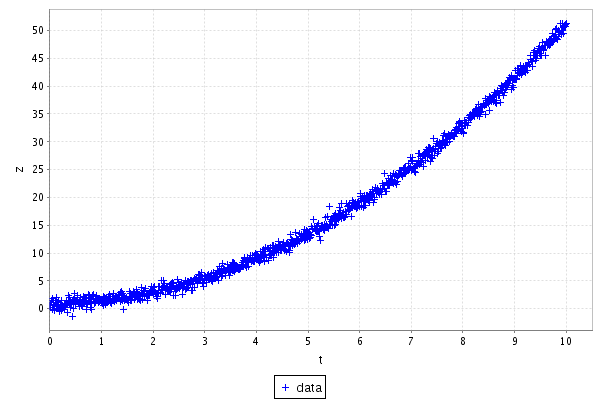

In [12]:
kernel.magics.html(tohtml(plt.chart))

## Apply Vector Assembler

In [13]:
val assembler = new VectorAssembler().
  setInputCols(Array("t")).
  setOutputCol("features")

assembler = vecAssembler_c084ee660fa9


vecAssembler_c084ee660fa9

In [14]:
val df_v = assembler.transform(df).
    select(col("features"), col("z").as("label"))

df_v.show(10)

+-----------------+---------------+
|         features|          label|
+-----------------+---------------+
|            [0.0]| 0.581492499944|
|  [0.01001001001]| 0.109579774655|
|  [0.02002002002]| 0.736651613589|
|  [0.03003003003]|  1.48598356416|
|  [0.04004004004]|  1.74318272131|
|[0.0500500500501]|-0.180520976165|
|[0.0600600600601]| 0.592680533783|
|[0.0700700700701]|  1.16782126493|
|[0.0800800800801]| 0.556445117136|
|[0.0900900900901]|-0.408362632843|
+-----------------+---------------+
only showing top 10 rows



df_v = [features: vector, label: double]


[features: vector, label: double]

## Create polynomial features

In [15]:
val polynomialExpansion = new PolynomialExpansion().
  setInputCol("features").
  setOutputCol("polyFeatures").
  setDegree(2)

polynomialExpansion = poly_b25d671d4c7f


poly_b25d671d4c7f

In [16]:
val df_p = polynomialExpansion.transform(df_v)
df_p.show(10)

+-----------------+---------------+--------------------+
|         features|          label|        polyFeatures|
+-----------------+---------------+--------------------+
|            [0.0]| 0.581492499944|           [0.0,0.0]|
|  [0.01001001001]| 0.109579774655|[0.01001001001,1....|
|  [0.02002002002]| 0.736651613589|[0.02002002002,4....|
|  [0.03003003003]|  1.48598356416|[0.03003003003,9....|
|  [0.04004004004]|  1.74318272131|[0.04004004004,0....|
|[0.0500500500501]|-0.180520976165|[0.0500500500501,...|
|[0.0600600600601]| 0.592680533783|[0.0600600600601,...|
|[0.0700700700701]|  1.16782126493|[0.0700700700701,...|
|[0.0800800800801]| 0.556445117136|[0.0800800800801,...|
|[0.0900900900901]|-0.408362632843|[0.0900900900901,...|
+-----------------+---------------+--------------------+
only showing top 10 rows



df_p = [features: vector, label: double ... 1 more field]


[features: vector, label: double ... 1 more field]

## Split into train and test sets

In [17]:
val Array(trainingData, testData) = df_p.randomSplit(Array(0.7, 0.3))

trainingData = [features: vector, label: double ... 1 more field]
testData = [features: vector, label: double ... 1 more field]


[features: vector, label: double ... 1 more field]

## Scale the features

In [18]:
val scaler = new MinMaxScaler().
  setInputCol("polyFeatures").
  setOutputCol("scaledFeatures")

scaler = minMaxScal_ded00d763f14


minMaxScal_ded00d763f14

In [19]:
val s = scaler.fit(trainingData)

s = minMaxScal_ded00d763f14


minMaxScal_ded00d763f14

In [20]:
val trainingData_s = s.transform(trainingData)
val testData_s = s.transform(testData)

trainingData_s = [features: vector, label: double ... 2 more fields]
testData_s = [features: vector, label: double ... 2 more fields]


[features: vector, label: double ... 2 more fields]

## Train the model

In [21]:
val lr = new LinearRegression().
  setMaxIter(100).
  setElasticNetParam(1.0).
  setFeaturesCol("scaledFeatures")
  //setLabelCol("y"). //by default input columns: label and features
  //setFeaturesCol("x")

lr = linReg_5bc45ec81f82


linReg_5bc45ec81f82

In [22]:
val model = lr.fit(trainingData_s)

model = linReg_5bc45ec81f82


linReg_5bc45ec81f82

In [23]:
model.summary.totalIterations

7

In [24]:
model.coefficients

[0.6381087402382835,49.49764819503393]

In [25]:
model.intercept

0.8299513187908154

## Make predictions

In [26]:
val predictions = model.transform(testData_s)

predictions = [features: vector, label: double ... 3 more fields]


[features: vector, label: double ... 3 more fields]

## Evaluate the model

In [27]:
val evaluator = new RegressionEvaluator().setMetricName("r2")
  //setLabelCol("label").
  //setPredictionCol("prediction")

evaluator = regEval_eccd88d192a4


regEval_eccd88d192a4

In [28]:
val r2 = evaluator.evaluate(predictions)

r2 = 0.9980241803169553


0.9980241803169553

## Compare data with prediction

In [29]:
val y = predictions.select("label").as[Double].collect
val yp = predictions.select("prediction").as[Double].collect
val t = predictions.select("scaledFeatures").
    collect.map(row=>row(0).asInstanceOf[DenseVector](0))

y = Array(1.74318272131, 1.94883603889, 1.11205142444, 0.34882465376, -0.279015109822, 0.784841314591, -0.338502242616, 1.50137419912, 0.20951062813, 0.742837121531, 0.552932806473, 0.994512600596, 1.486129489, -0.691767857101, 0.175622098048, 1.72418262366, 1.70969681839, 1.51903529032, 1.25087167608, 1.36911051033, 0.347933410227, 2.01436361109, 2.21000017415, 2.0673955525, 1.89566662944, 1.50137316734, 0.774173854602, 2.60185237526, 1.99068481486, 0.248055781831, 1.17302059074, 1.84068229303, 1.07939491706, 1.24728472373, 1.58588614853, 0.639644292422, 1.78130973672, 2.21635263918, 2.70587739704, 1.91258943603, 1.78195261151, 2.466084772, 2.00906572829, 3.03945070405, 2.64466839901, 1.44823549776, 1.93261938255, 2.58044430673, 2.62564471694, 1.4284539125, 2.65496130413...


[1.74318272131, 1.94883603889, 1.11205142444, 0.34882465376, -0.279015109822, 0.784841314591, -0.338502242616, 1.50137419912, 0.20951062813, 0.742837121531, 0.552932806473, 0.994512600596, 1.486129489, -0.691767857101, 0.175622098048, 1.72418262366, 1.70969681839, 1.51903529032, 1.25087167608, 1.36911051033, 0.347933410227, 2.01436361109, 2.21000017415, 2.0673955525, 1.89566662944, 1.50137316734, 0.774173854602, 2.60185237526, 1.99068481486, 0.248055781831, 1.17302059074, 1.84068229303, 1.07939491706, 1.24728472373, 1.58588614853, 0.639644292422, 1.78130973672, 2.21635263918, 2.70587739704, 1.91258943603, 1.78195261151, 2.466084772, 2.00906572829, 3.03945070405, 2.64466839901, 1.44823549776, 1.93261938255, 2.58044430673, 2.62564471694, 1.4284539125, 2.65496130413, 3.06934284746, 2.4275568121, 3.23364756125, 3.99973725201, 2.84243201586, 3.92830882668, 4.03038765504, 3.20167276866, 3.23431380394, 3.41968505768, 3.9703758334, 3.2237228606, 3.05131203493, 3.89977749398, 3.1154342955, 4.28

In [30]:
val fig2 = Figure()
val plt2 = fig2.subplot(0)

fig2 = breeze.plot.Figure@1fbc5498
plt2 = breeze.plot.Plot@785f2b23


breeze.plot.Plot@785f2b23

In [31]:
plt2 += plot(t, y, '+', name = "data", colorcode="blue")
plt2 += plot(t, yp, '-', name = "predictions", colorcode="red")

plt2.legend = true
//plt.title = "xxx"
plt2.xlabel = "t"
//plt.xlim(-25,50)
plt2.ylabel = "z"

plt2.legend: Boolean = true
plt2.xlabel: String = t
plt2.ylabel: String = z



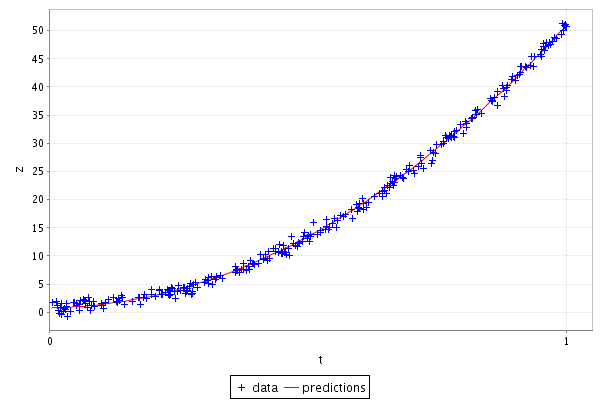

In [32]:
kernel.magics.html(tohtml(plt2.chart))